In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from math import *
from copy import *


def flatten(l):
    flat_list = [item for sublist in l for item in sublist]
    return flat_list

In [2]:
# Load the data

lis_bos1 = pd.read_csv('airbnb_similarity_insight/data/air-bnb-listings_bos1.csv', sep = ';')
lis_nyc1 = pd.read_csv('airbnb_similarity_insight/data/air-bnb-listings_nyc1.csv', sep = ';')
lis_lon1 = pd.read_csv('airbnb_similarity_insight/data/air-bnb-listings_lon1.csv', sep = ';')

lis_bos2 = pd.read_csv('airbnb_similarity_insight/data/airbnb-listings_bos2.csv', sep = ';')
lis_nyc2 = pd.read_csv('airbnb_similarity_insight/data/airbnb-listings_nyc2.csv', sep = ';')
lis_lon2 = pd.read_csv('airbnb_similarity_insight/data/airbnb-listings_lon2.csv', sep = ';')

reviews = pd.read_csv('airbnb_similarity_insight/data/airbnb-reviews.csv', sep = ';')

rate_bos = pd.read_csv('airbnb_similarity_insight/data/airbnb-ratings_bos.csv', sep = ';')
rate_nyc = pd.read_csv('airbnb_similarity_insight/data/airbnb-ratings_nyc.csv', sep = ';')
rate_lon = pd.read_csv('airbnb_similarity_insight/data/airbnb-ratings_lon.csv', sep = ';')


/Users/bennett/anaconda3/envs/airbnb_p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/bennett/anaconda3/envs/airbnb_p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (67,85,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/bennett/anaconda3/envs/airbnb_p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (25,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(48864, 17)


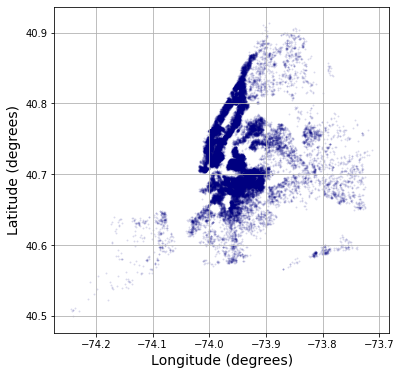

In [79]:
this_df =  lis_nyc1
print(np.shape(this_df))
lats = []
longs = []
for i in this_df.Coordinates:
    lats.append(float(i.split(',')[0]))
    longs.append(float(i.split(',')[1]))

plt.figure(1, (6, 6,))
plt.scatter(longs, lats, c='navy', s=3.5, lw=0, alpha = 0.15)
plt.xlabel('Longitude (degrees)', fontsize = 14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.grid()
plt.show()

In [80]:
# How many listings do I have total in London, New York, and Boston

pairs = [(lis_lon1, lis_lon2, 'London'), (lis_nyc1, lis_nyc2, 'New York'), (lis_bos1, lis_bos2, 'Boston')]

unique_room_ids = {}
for i, (large, small, city) in enumerate(pairs):
    print(city, np.shape(large)[0], np.shape(small)[0])
    large_id = large['Room ID']
    small_id = small['ID']
    in_both = large_id[large_id.isin(small_id)]
    large_not_in_small = large_id[~large_id.isin(small_id)]
    small_not_in_large = small_id[~small_id.isin(large_id)]
    
    this_city_unique_ids = list(deepcopy(in_both))
    this_city_unique_ids += list(large_not_in_small)
    this_city_unique_ids += list(small_not_in_large)
    unique_room_ids[city] = this_city_unique_ids
    print('Total Listings:', len(this_city_unique_ids),'\n')
    
unique_room_id_list = flatten(unique_room_ids.values())

London 83850 47423
Total Listings: 110351 

New York 48864 19528
Total Listings: 60493 

Boston 6264 3382
Total Listings: 8282 



In [3]:
listings = [lis_lon1, lis_lon2, lis_nyc1, lis_nyc2, lis_bos1, lis_bos2]
ratings = [rate_lon, rate_nyc, rate_bos]
for this_df in listings:
    print(this_df.shape)
print('\n')
for this_df in ratings:
    print(this_df.shape)
print('\n')
print(reviews.shape)

(83850, 17)
(47423, 89)
(48864, 17)
(19528, 89)
(6264, 17)
(3382, 89)


(47423, 94)
(20807, 94)
(4692, 94)


(8348173, 6)


In [133]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [58]:
rate_nyc['Review scores rating']

0         94.0
1         97.0
2         85.0
3        100.0
4         90.0
         ...  
20802     90.0
20803     90.0
20804     40.0
20805    100.0
20806    100.0
Name: Review scores rating, Length: 20807, dtype: float64

In [4]:
for c in lis_nyc1.columns:
    print(c)
print('\n\n')
for c in lis_nyc2.columns:
    print(c)
print('\n\n')
for c in rate_nyc.columns:
    print(c)
print('\n\n')
for c in reviews.columns:
    print(c)

Room ID
Name
Host ID
Neighbourhood
Room type
Room Price
Minimum nights
Number of reviews
Date last review
Number of reviews per month
Rooms rent by the host
Availibility
Updated Date
City
Country
Coordinates
Location



ID
Listing Url
Scrape ID
Last Scraped
Name
Summary
Space
Description
Experiences Offered
Neighborhood Overview
Notes
Transit
Access
Interaction
House Rules
Thumbnail Url
Medium Url
Picture Url
XL Picture Url
Host ID
Host URL
Host Name
Host Since
Host Location
Host About
Host Response Time
Host Response Rate
Host Acceptance Rate
Host Thumbnail Url
Host Picture Url
Host Neighbourhood
Host Listings Count
Host Total Listings Count
Host Verifications
Street
Neighbourhood
Neighbourhood Cleansed
Neighbourhood Group Cleansed
City
State
Zipcode
Market
Smart Location
Country Code
Country
Latitude
Longitude
Property Type
Room Type
Accommodates
Bathrooms
Bedrooms
Beds
Bed Type
Amenities
Square Feet
Price
Weekly Price
Monthly Price
Security Deposit
Cleaning Fee
Guests Included
Extra

In [49]:
dfs = [lis_bos1, lis_bos2, lis_nyc1, lis_nyc2, lis_lon1, lis_lon2, 
      reviews, rate_bos, rate_nyc, rate_lon]

for idf, df in enumerate(dfs):
    col_dict = {c:c.lower().replace(' ', '_') for c in df.columns}
    df = df.rename(columns=col_dict)
    #print(df.columns)
    dfs[idf] = df

l2d = {'id':'room_id', 
        'geolocation':'coordinates', 
        'neighbourhood_cleansed': 'neighborhood_clean',
       'price':'room_price',
       'last_review':'date_last_review'}
l1d = {'neighbourhood': 'neighborhood_clean',
       'availibility': 'availability_365',
      'number_of_reviews_per_month': 'reviews_per_month'}

listings = dfs[:6]
for il, df in enumerate(listings):
    if not (il % 2): 
        this_dict = l1d
    else:
        this_dict = l2d
    df = df.rename(columns = this_dict)
    listings[il] = df

0

In [113]:
listings[0].columns

Index(['room_id', 'name', 'host_id', 'neighborhood_clean', 'room_type',
       'room_price', 'minimum_nights', 'number_of_reviews', 'date_last_review',
       'reviews_per_month', 'rooms_rent_by_the_host', 'availability_365',
       'updated_date', 'city', 'country', 'coordinates', 'location'],
      dtype='object')

In [78]:
for c in listings[0].columns:
    if c in listings[1].columns:
        print(c)

room_id
name
host_id
neighborhood_clean
room_type
room_price
minimum_nights
number_of_reviews
date_last_review
reviews_per_month
availability_365
city
country
coordinates


In [150]:
len(unique_room_id_list)

179126

In [111]:
# Join all the listings together
double_covered_rooms_london = listings[5].room_id[listings[5].room_id.isin(listings[4].room_id)]
double_covered_rooms_london

1          588026
2        17028877
3          598125
4        12962464
7         6095161
           ...   
47410      325305
47413    14261572
47416    16596405
47418    12125713
47421     5403571
Name: room_id, Length: 20922, dtype: int64

In [102]:
unique_room_id_list


(1, 17)

In [142]:
reviews.comments

0          First time using Airbnb and couldn't be happie...
1          Muy bien ubicado. Las fotos y la descrpción co...
2          L'appartement est très sympa.\r\nLa chambre qu...
3          I had really good time in Alex apartment and I...
4          Place is pretty nice and Sergio was a big help...
                                 ...                        
8348168    Super cute place! James and Yuna let us check ...
8348169                            Great place. Great hosts.
8348170    Everything they said was true! It's a nice pla...
8348171    James and Yuna's place was awesome. They where...
8348172    A nice appartment in a friendly and quiet neig...
Name: comments, Length: 8348173, dtype: object

In [112]:
pd.set_option('display.max_columns', None)
display(listings[5][listings[5].room_id == 16596405])
display(listings[4][listings[4].room_id == 16596405])

,room_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,street,neighbourhood,neighborhood_clean,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,room_price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,date_last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,cancellation_policy,calculated_host_listings_count,reviews_per_month,coordinates,features
47416,16596405,https://www.airbnb.com/rooms/16596405,20170304065726,2017-03-05,Elegant Spacious Apartment 2 mins walk from Excel,"Set in a modern 2 bed-room apartment, a comfor...","Close to excel, modern finish, beautiful view","Set in a modern 2 bed-room apartment, a comfor...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://public.opendatasoft.com/api/v2/catalog...,NaN,109473672,https://www.airbnb.com/users/show/109473672,Vi,2017-01-02,GB,NaN,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/16978f8e-5...,https://a0.muscache.com/im/pictures/16978f8e-5...,NaN,1.0,1.0,"email,phone,reviews","Western Gateway, London, England E16 1DR, Unit...",NaN,Newham,NaN,London,England,E16 1DR,London,"London, United Kingdom",GB,United Kingdom,51.509206,0.033435,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"Air conditioning,Kitchen,Free parking on premi...",NaN,15.0,NaN,NaN,NaN,15.0,1,0,1,1125,5 weeks ago,NaN,18,18,18,18,2017-03-05,4,2017-01-06,2017-02-27,90.0,10.0,10.0,9.0,9.0,9.0,10.0,NaN,NaN,moderate,1,2.03,"51.5092056431,0.0334347590445",Host Has Profile Pic


,room_id,name,host_id,neighborhood_clean,room_type,room_price,minimum_nights,number_of_reviews,date_last_review,reviews_per_month,rooms_rent_by_the_host,availability_365,updated_date,city,country,coordinates,location
72817,16596405,Elegant Spacious Apartment 2 mins walk from Ex...,109473672,Newham,Entire home/apt,39,1,8,2018-08-12,0.26,1,0,2019-07-10,London,United kingdom,"51.5094129804,0.032034351754","United kingdom, London, Newham"


In [136]:
list(reviews[reviews.listing_id == 598125].reviewer_id)

[]

In [146]:
# build a DataFrame of room_id --> list of reviewers, list of comments
# Takes some compute time (~10 minutes)
reviewers_for_room = {room_id: list(reviews[reviews.listing_id == room_id].reviewer_id) for room_id in unique_room_id_list}
comments_for_room = {room_id: list(reviews[reviews.listing_id == room_id].comments) for room_id in unique_room_id_list}
room_db = pd.DataFrame({'room_id':sorted(unique_room_id_list),
                       'user_id':[reviewers_for_room[k] for k in sorted(unique_room_id_list)],
                       'comments': [comments_for_room[k] for k in sorted(unique_room_id_list)]})

In [178]:
sorted(np.unique([5, 3, 67, 1, 3, 5, 6]))

[1, 3, 5, 6, 67]

In [189]:
reviews[reviews.listing_id.isin(unique_room_id_list)].shape

(1207683, 6)

In [201]:
unique_reviewer_id = sorted(np.unique(reviews[reviews.listing_id.isin(unique_room_id_list)].reviewer_id))


In [203]:
rooms_for_reviewer = {rev_id: list(reviews[reviews.reviewer_id == rev_id].listing_id) for rev_id in unique_reviewer_id}


KeyboardInterrupt: 

In [198]:
comments_for_reviewer = {rev_id: list(reviews[reviews.reviewer_id == rev_id].comments) for rev_id in unique_reviewer_id}


In [171]:
reviews[reviews.listing_id == 2515].reviewer_id

447464         9193
447468        26718
447472        68468
447476       185050
447480       456184
             ...   
6654677    27541429
6654685    51338327
6654693    18177883
6654701    57605175
6654709    29193754
Name: reviewer_id, Length: 152, dtype: int64

In [199]:
len(comments_for_reviewer.values())

52237

In [174]:
reviews[reviews.listing_id == 2515].reviewer_name

447464                  Holly
447468                   Greg
447472     Olivier And Ingrid
447476                  Gerry
447480                 Nicola
                  ...        
6654677              Stéphane
6654685                   Eva
6654693                 Najah
6654701              Johannes
6654709                 Shima
Name: reviewer_name, Length: 152, dtype: object

In [172]:
reviews[reviews.listing_id == 2515].comments

447464     Stephanie's offered all the most important thi...
447468                    awesome couldn't have been better.
447472     Nous avons passé un agréable séjour chez Stéph...
447476     We stayed at the 111th Street apartment with S...
447480     Very conveniently located just North of Centra...
                                 ...                        
6654677    Appartement idéalement placé pour un jogging à...
6654685    Mizi is a wonderful host. The checking in to t...
6654693    Stephanie is an awesome host! Its our first ti...
6654701    We had a great time in New York, everything re...
6654709    This place was awesome! Close to bike rentals,...
Name: comments, Length: 152, dtype: object

In [170]:
room_db.loc[2515, :].comments[17]

"The house was fantastic and great location for the weekend. \r\nRoom was clean and bed comfy. \r\nLidia was a great host and made you feel so welcome. \r\nWill definitely stay here next time I'm in this area."

In [148]:
# build a DataFrame of user_id --> (list of rooms, list of comments for those rooms)

In [200]:
20685563 in unique_room_id_list

True

In [131]:
print(np.sum(reviews.listing_id.isin(unique_room_id_list)))

9890
1207683


In [81]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                     'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                     'value': [5, 6, 7, 8]})
print(df1, df2)

  lkey  value
0  foo      1
1  bar      2
2  baz      3
3  foo      5   rkey  value
0  foo      5
1  bar      6
2  baz      7
3  foo      8


In [82]:
df1.merge(df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [9]:

# How many Users have STAYED in AT LEAST ONE of the associated listings?
unique_room_id_list = flatten(unique_room_ids.values())

print('Number of Listings across cities:', len(unique_room_id_list))
reviews_of_my_listings = reviews[reviews.listing_id.isin(unique_room_id_list)]
print('Number of Reviews of these listings:', np.shape(reviews_of_my_listings)[0])

unique_reviewers_my_listings = np.unique(list(reviews_of_my_listings.reviewer_id))
print('Number of Unique Reviewers of these listings:', len(unique_reviewers_my_listings))

# Make a dictionary assigning reviewers to apartments
# Keys: `unique_reviewers_my_listings`
# Values: the list of room_ids they reviewed
reviewers_listing_dict = {}
for r in unique_reviewers_my_listings:
    reviewers_listing_dict[r] = reviews[reviews.reviewer_id == r]

# Now, what is the distribution of # of reviews by each user?
users_with_n_listings = []
for i in range(20):
    users_with_n_listings = len(np.ara)

      


Number of Listings across cities: 179126
Number of Reviews of these listings: 1207683
Number of Unique Reviewers of these listings: 1044730


KeyboardInterrupt: 

In [158]:
# Make a dictionary assigning reviewers to apartments
# Keys: `unique_reviewers_my_listings`
# Values: the list of room_ids they reviewed
reviewers_listing_dict = {}
for i, r in enumerate(unique_reviewers_my_listings):
    reviewers_listing_dict[r] = reviews[reviews.reviewer_id == r].reviewer_id
    if not i % 50000:
        print(i)
# make a df from the dictionary of reviewer_ids --> list-of-room_ids
unique_rev_df = pd.DataFrame(list(reviewers_listing_dict.items()), columns=['Reviewer_id', 'Listing_ids'])

# Now, what is the distribution of # of reviews by each user?
users_with_n_listings = []
#for r, s in reviewers_listing_dict.items():
#    n_listings = len(s.listing_id)
#    users_with_n_listings[n_listings] += 1
for i in range(20):
    users_with_n_listings.append(np.shape(unique_rev_df[unique_rev_df.apply(lambda x: len(x.Listing_ids) == i)])[0])
plt.bar(range(20), users_with_n_listings)
plt.xlabel('Number of Different Reviews')
plt.ylabel('Number of Reviewers')
plt.show()

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000


In [24]:
#import cPickle as cp
import pickle
lis_bos1.to_pickle('airbnb_similarity_insight/pickles/lis_bos1.pkl')
lis_bos2.to_pickle('airbnb_similarity_insight/pickles/lis_bos2.pkl')
lis_nyc1.to_pickle('airbnb_similarity_insight/pickles/lis_nyc1.pkl')
lis_nyc2.to_pickle('airbnb_similarity_insight/pickles/lis_nyc2.pkl')
lis_lon1.to_pickle('airbnb_similarity_insight/pickles/lis_lon1.pkl')
lis_lon2.to_pickle('airbnb_similarity_insight/pickles/lis_lon2.pkl')
reviews.to_pickle('airbnb_similarity_insight/pickles/reviews.pkl')
rate_bos.to_pickle('airbnb_similarity_insight/pickles/rate_bos.pkl')
rate_nyc.to_pickle('airbnb_similarity_insight/pickles/rate_nyc.pkl')
rate_lon.to_pickle('airbnb_similarity_insight/pickles/rate_lon.pkl')

In [149]:
with open('airbnb_similarity_insight/pickles/unique_room_id_list.pkl', 'wb') as pickle_file:
    pickle.dump(unique_room_id_list, pickle_file)

with open('airbnb_similarity_insight/pickles/reviewers_for_room.pkl', 'wb') as pickle_file:
    pickle.dump(reviewers_for_room, pickle_file)
    
with open('airbnb_similarity_insight/pickles/comments_for_room.pkl', 'wb') as pickle_file:
    pickle.dump(comments_for_room, pickle_file)
    
with open('airbnb_similarity_insight/pickles/room_db.pkl', 'wb') as pickle_file:
    pickle.dump(room_db, pickle_file)
    
    

In [252]:
# Tokenization: Split the text into sentences and the sentences into words. 
# Lowercase the words and remove punctuation.

# Words that have fewer than 3 characters are removed.

# Words are lemmatized — words in third person are changed to first person 
# and verbs in past and future tenses are changed into present.

# Words are stemmed — words are reduced to their root form.

# All stopwords are removed.

stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [210]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/bennett/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [224]:

data_text = room_db[['comments']]
data_text['index'] = data_text.index
bumpy_documents = data_text
doc_sample = bumpy_documents[bumpy_documents['index'] == 4310].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

/Users/bennett/anaconda3/envs/airbnb_p3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [336]:
from langdetect import detect
detect("War doesn't show who's right, just who's left.")

'en'

In [ ]:
detect("Ein, zwei, drei, vier")

In [334]:
# trial analysis on every 10th comment in english
flat_doc_comments = []
indices = []
rids = []
uids = []
c_and_i = list(zip(list(bumpy_documents.comments), 
                   list(bumpy_documents.index), 
                   list(room_db.room_id),
                   list(room_db.user_id)))
for i, (cs, ind, rid, uid) in enumerate(c_and_i[::10]): # EVERY 10TH
    flat_doc_comments.extend(cs)
    indices.extend([ind]*len(cs))
    rids.extend([rid]*len(cs))
    uids.extend([uid]*len(cs))

flat_room_db = pd.DataFrame({'listing_id':rids, 'user_id':uids,
                            'comments':flat_doc_comments, 'indices':indices})



HTTPError: HTTP Error 429: Too Many Requests

In [344]:
# ONLY LOOKS AT REVIEWS WITH 3+ CHARACTERS
# ONLY LOOK AT REVIEWS IN ENGLISH
flat_room_db.comments = flat_room_db.comments.fillna('')
flat_room_db = flat_room_db[flat_room_db.comments.apply(lambda x: len(x) >= 3)]
def clean_detect(x):
    try:
        return detect(x)
    except:
        return 'No Language'
flat_room_db = flat_room_db[flat_room_db.comments.apply(lambda x: clean_detect(x) =='en')]

103028


In [347]:
# old
processed_comments[1400]

['wonder',
 'hous',
 'clean',
 'need',
 'neighborhood',
 'nice',
 'subway',
 'minut',
 'recommend']

In [348]:
# Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.
dictionary = gensim.corpora.Dictionary(processed_comments)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 access
1 away
2 blanket
3 clean
4 comfort
5 easi
6 feel
7 find
8 fresh
9 futur
10 generous


In [349]:
# Filter out tokens that appear in
#less than no_below documents (absolute number) or
#more than no_above documents (fraction of total corpus size, not absolute number).
#after the above two steps, keep only the first 100000 most frequent tokens.

dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

In [350]:
#Gensim doc2bow
#For each document we create a dictionary reporting how many
#words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.
bow_corpus = [dictionary.doc2bow(comment) for comment in processed_comments]
bow_corpus[4310]

[(17, 1),
 (18, 1),
 (24, 1),
 (56, 1),
 (95, 1),
 (96, 1),
 (105, 1),
 (113, 1),
 (126, 1),
 (184, 1),
 (241, 1),
 (276, 2),
 (541, 1),
 (596, 1),
 (1157, 1),
 (3950, 1)]

In [351]:
# Preview Bag Of Words for our sample preprocessed document.
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
                                                bow_doc_4310[i][1]))

Word 17 ("quiet") appears 1 time.
Word 18 ("room") appears 1 time.
Word 24 ("welcom") appears 1 time.
Word 56 ("great") appears 1 time.
Word 95 ("host") appears 1 time.
Word 96 ("inform") appears 1 time.
Word 105 ("respect") appears 1 time.
Word 113 ("work") appears 1 time.
Word 126 ("hous") appears 1 time.
Word 184 ("will") appears 1 time.
Word 241 ("space") appears 1 time.
Word 276 ("need") appears 2 time.
Word 541 ("case") appears 1 time.
Word 596 ("chat") appears 1 time.
Word 1157 ("one") appears 1 time.
Word 3950 ("keith") appears 1 time.


In [352]:
#Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, 
# then apply transformation to the entire corpus and call it ‘corpus_tfidf’.
# Finally we preview TF-IDF scores for our first document.
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.12979775136246713),
 (1, 0.11692751953591331),
 (2, 0.26454469230023775),
 (3, 0.05064927933876893),
 (4, 0.13905670669299866),
 (5, 0.08578968030144318),
 (6, 0.10933658183134143),
 (7, 0.24930954859331053),
 (8, 0.19412845117244554),
 (9, 0.18864759372046527),
 (10, 0.21907916865090696),
 (11, 0.2858856339030992),
 (12, 0.21243288655507453),
 (13, 0.23272481775344833),
 (14, 0.1419521564465407),
 (15, 0.16314469209403407),
 (16, 0.17718535172151698),
 (17, 0.10147114326021686),
 (18, 0.06590785679547552),
 (19, 0.5563613847524584),
 (20, 0.13784236191170585),
 (21, 0.16437761568219209),
 (22, 0.1410755521440986),
 (23, 0.13411010701503176),
 (24, 0.08711157487698007)]


In [353]:
# Running LDA using Bag of Words
# Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=50, id2word=dictionary, passes=2, workers=3)

In [354]:
# For each topic, we will explore the words occuring in that topic and its relative weight.

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.059*"apart" + 0.029*"subway" + 0.027*"place" + 0.022*"locat" + 0.020*"easi" + 0.018*"great" + 0.018*"walk" + 0.016*"time" + 0.015*"manhattan" + 0.013*"restaur"
Topic: 1 
Words: 0.029*"hospit" + 0.023*"thank" + 0.019*"consider" + 0.015*"ador" + 0.014*"christma" + 0.013*"comfort" + 0.013*"sean" + 0.012*"hous" + 0.011*"love" + 0.011*"london"
Topic: 2 
Words: 0.042*"away" + 0.041*"block" + 0.029*"squar" + 0.028*"great" + 0.028*"locat" + 0.024*"time" + 0.022*"place" + 0.017*"subway" + 0.017*"park" + 0.016*"build"
Topic: 3 
Words: 0.026*"great" + 0.023*"place" + 0.020*"apart" + 0.013*"love" + 0.013*"wine" + 0.012*"bottl" + 0.011*"cool" + 0.011*"brooklyn" + 0.011*"coffe" + 0.011*"williamsburg"
Topic: 4 
Words: 0.052*"place" + 0.044*"appart" + 0.039*"york" + 0.033*"great" + 0.025*"nice" + 0.024*"alex" + 0.022*"host" + 0.021*"time" + 0.020*"mike" + 0.020*"help"
Topic: 5 
Words: 0.032*"boston" + 0.026*"host" + 0.021*"home" + 0.019*"comfort" + 0.017*"thank" + 0.016*"place" + 0.

In [360]:
# Running LDA using TF-IDF

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=5)

for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5782599449157715	 
Topic: 0.007*"room" + 0.006*"place" + 0.006*"apart" + 0.006*"great" + 0.006*"nice" + 0.005*"clean" + 0.005*"good" + 0.005*"host" + 0.004*"locat" + 0.004*"time"

Score: 0.3772836923599243	 
Topic: 0.027*"great" + 0.019*"place" + 0.015*"locat" + 0.014*"host" + 0.012*"apart" + 0.012*"nice" + 0.012*"perfect" + 0.011*"recommend" + 0.011*"clean" + 0.010*"love"


In [361]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.009*"place" + 0.008*"great" + 0.008*"apart" + 0.007*"nice" + 0.007*"comfort" + 0.007*"subway" + 0.006*"clean" + 0.006*"locat" + 0.006*"room" + 0.006*"close"
Topic: 1 
Words: 0.020*"good" + 0.016*"nice" + 0.012*"place" + 0.011*"clean" + 0.011*"great" + 0.010*"room" + 0.010*"locat" + 0.009*"valu" + 0.009*"host" + 0.008*"hous"
Topic: 2 
Words: 0.027*"great" + 0.019*"place" + 0.015*"locat" + 0.014*"host" + 0.012*"apart" + 0.012*"nice" + 0.012*"perfect" + 0.011*"recommend" + 0.011*"clean" + 0.010*"love"
Topic: 3 
Words: 0.008*"flat" + 0.007*"london" + 0.006*"apart" + 0.006*"great" + 0.006*"walk" + 0.006*"nice" + 0.006*"place" + 0.006*"good" + 0.006*"locat" + 0.005*"station"
Topic: 4 
Words: 0.007*"place" + 0.007*"apart" + 0.006*"great" + 0.005*"nice" + 0.005*"time" + 0.005*"room" + 0.005*"locat" + 0.005*"clean" + 0.005*"love" + 0.005*"host"
Topic: 5 
Words: 0.008*"great" + 0.008*"place" + 0.007*"london" + 0.007*"nice" + 0.007*"host" + 0.007*"locat" + 0.007*"love" + 0.006*

In [358]:
# Performance evaluation by classifying sample document using LDA Bag of Words model
# We will check where our test document would be classified.
print(processed_comments[4310])
print(flat_room_db.comments[4310])


for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

['place', 'great', 'stay', 'brooklyn', 'think', 'manhattan', 'love', 'quiet', 'relax', 'feel', 'surpris', 'conveni', 'get', 'take', 'uber', 'take', 'subway', 'min', 'away', 'citi', 'walk', 'bike', 'park', 'brooklyn', 'museum', 'love', 'restaur', 'bar', 'food', 'market', 'artist', 'mecca', 'neighborhood', 'kelli', 'bettina']
This place was great! We have never stayed in Brooklyn, we always thought you had to be in Manhattan. We loved the quiet and relaxed feeling. We were so surprised at how convenient this apt was for getting anywhere. We took UBER from JFK, we took the subway 4mins away to get into the City. We could walk and or bike to the park and Brooklyn museum. We loved the restaurants, bars, Whole Foods Market and the artist mecca this neighborhood is all about. 
Ron, Kelly and Bettina

Score: 0.38277870416641235	 
Topic: 0.024*"sarah" + 0.024*"great" + 0.024*"properti" + 0.020*"london" + 0.020*"room" + 0.020*"love" + 0.019*"place" + 0.018*"recommend" + 0.017*"welcom" + 0.016*"h

In [301]:
# Performance evaluation by classifying sample document using LDA TF-IDF model.
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.4622637629508972	 
Topic: 0.036*"great" + 0.021*"place" + 0.020*"nice" + 0.018*"locat" + 0.016*"host" + 0.016*"stay" + 0.011*"recommend" + 0.011*"excel" + 0.011*"clean" + 0.010*"apart"

Score: 0.2583853006362915	 
Topic: 0.009*"place" + 0.008*"great" + 0.007*"stay" + 0.007*"apart" + 0.006*"clean" + 0.006*"nice" + 0.006*"locat" + 0.005*"perfect" + 0.005*"recommend" + 0.005*"room"

Score: 0.17933611571788788	 
Topic: 0.028*"très" + 0.019*"nous" + 0.015*"appart" + 0.014*"bien" + 0.014*"pour" + 0.009*"dan" + 0.009*"tout" + 0.009*"situé" + 0.008*"séjour" + 0.008*"logement"

Score: 0.014289598912000656	 
Topic: 0.014*"good" + 0.011*"place" + 0.011*"nice" + 0.010*"clean" + 0.010*"stay" + 0.010*"great" + 0.009*"locat" + 0.009*"flat" + 0.008*"comfort" + 0.008*"london"

Score: 0.01428865548223257	 
Topic: 0.011*"perfect" + 0.011*"place" + 0.011*"great" + 0.010*"amaz" + 0.009*"awesom" + 0.009*"stay" + 0.009*"host" + 0.008*"locat" + 0.008*"apart" + 0.008*"love"

Score: 0.0142880268394947